In [1]:
# Imports
import numpy as np
import pandas as pd

In [2]:
# Hierarchical Indexing - Working with higher dimensional data
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
print(data, '\n')
print(data.index, '\n')           # show MultiIndex
print(data['b'], '\n')            # show subset 'b' values
print(data['b':'c'], '\n')        # show subset 'b' and 'c' using slicing
print(data.loc[['b', 'd']], '\n') # show subset 'b' and 'd' using indexing
print(data.loc[:, 2], '\n')       # show inner level index 2 of each group
print(data.unstack(), '\n') # Create DataFrame from a Series w/ '.unstack()'
print(data.unstack().stack())     # or the inverse with '.stack()'

a  1    1.789063
   2   -1.081396
   3    2.196072
b  1    0.394520
   3   -0.855632
c  1    0.353693
   2   -0.919266
d  2    0.532845
   3    0.841663
dtype: float64 

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]]) 

1    0.394520
3   -0.855632
dtype: float64 

b  1    0.394520
   3   -0.855632
c  1    0.353693
   2   -0.919266
dtype: float64 

b  1    0.394520
   3   -0.855632
d  2    0.532845
   3    0.841663
dtype: float64 

a   -1.081396
c   -0.919266
d    0.532845
dtype: float64 

          1         2         3
a  1.789063 -1.081396  2.196072
b  0.394520       NaN -0.855632
c  0.353693 -0.919266       NaN
d       NaN  0.532845  0.841663 

a  1    1.789063
   2   -1.081396
   3    2.196072
b  1    0.394520
   3   -0.855632
c  1    0.353693
   2   -0.919266
d  2    0.532845
   3    0.841663
dtype: float64


In [3]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
print(frame, '\n')

frame.index.names = ['key1', 'key2']     # Label rows
frame.columns.names = ['state', 'color'] # Label columns
print(frame, '\n')
print(frame['Ohio'], '\n')         # show subset of columns using one label

# create MultiIndex directly for later use
print(pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'],
                                 ['Green', 'Red', 'Green']],
                                names=['state', 'color']))

     Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11 

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11 

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10 

MultiIndex(levels=[['Colorado', 'Ohio'], ['Green', 'Red']],
           codes=[[1, 1, 0], [0, 1, 0]],
           names=['state', 'color'])


In [4]:
# Sorting and reordering
print(frame, '\n')
print(frame.swaplevel('key1', 'key2'), '\n') # swap columns 'key1', 'key2'
print(frame.sort_index(level = 1), '\n')     # reorder rows based on 'key2'
# swap columns 'key1', 'key2' then reorder rows based on 'key2'
print(frame.swaplevel(0, 1).sort_index(level = 0), '\n')

# Summation or other statistics
print(frame.sum(level = 'key2', axis = 0), '\n') # sum rows based on 'key2'
print(frame.sum(level = 'color', axis = 1))  # sum columns based on 'color'

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11 

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11 

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11 

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11 

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16 

color      Green  Red
key1 key2            
a    1   

In [5]:
# DataFrame indexing
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})

frame2 = frame.set_index(['c', 'd']) 
print(frame, '\n')
print(frame2, '\n')

print(frame2.reset_index(), '\n') # swap columns ('c', 'd') with ('a', 'b')
# swap columns ('c', 'd') with ('a', 'b'), then reindex using 'c' then 'd'
print(frame.set_index(['c', 'd'], drop = False)) # Copy ('c', 'd')

   a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3 

       a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1 

     c  d  a  b
0  one  0  0  7
1  one  1  1  6
2  one  2  2  5
3  two  0  3  4
4  two  1  4  3
5  two  2  5  2
6  two  3  6  1 

       a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3


In [6]:
# Merging Datasets
# pandas.merge() - Database style joins
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
print(df1, '\n')
print(df2, '\n')
# Many to one join using 'key' removing rows which contain 'NaN's
print(pd.merge(df1, df2, on = 'key'), '\n') 
# Merge all data on 'left' and 'right' by doing an 'outer' join
print(pd.merge(df1, df2, how = 'outer'), '\n')

df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
# Merge Datasets by specifying column names and by doing an intersection
print(pd.merge(df3, df4, left_on = 'lkey', right_on = 'rkey'))

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6 

  key  data2
0   a      0
1   b      1
2   d      2 

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0 

  key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0 

  lkey  data1 rkey  data2
0    b      0    b      1
1    b      1    b      1
2    b      6    b      1
3    a      2    a      0
4    a      4    a      0
5    a      5    a      0


<center>'how' argument join types</center>

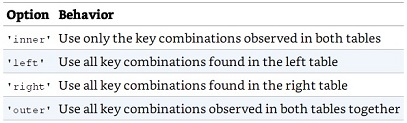

In [7]:
# Many to Many merges
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
print(df1, '\n')
print(df2, '\n')
# merge based on 'key' removing rows that result in 'NaN' values
print(pd.merge(df1, df2, how = 'inner'), '\n')
# merge based on 'key' using all combinations specified in 'df1' dataset
print(pd.merge(df1, df2, on = 'key', how = 'left'))

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5 

  key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4 

  key  data1  data2
0   b      0      1
1   b      0      3
2   b      1      1
3   b      1      3
4   b      5      1
5   b      5      3
6   a      2      0
7   a      2      2
8   a      4      0
9   a      4      2 

   key  data1  data2
0    b      0    1.0
1    b      0    3.0
2    b      1    1.0
3    b      1    3.0
4    a      2    0.0
5    a      2    2.0
6    c      3    NaN
7    a      4    0.0
8    a      4    2.0
9    b      5    1.0
10   b      5    3.0


In [8]:
# Merge using multiple keys
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
# Merge using specified keys retaining rows containg 'NaN' values
print(pd.merge(left, right, on = ['key1', 'key2'], how = 'outer'), '\n')

# Handling overlapping column names using suffixes
print(pd.merge(left, right, on = 'key1'), '\n') # default suffixes
print(pd.merge(left, right, on = 'key1', suffixes = ('_left', '_right')))

  key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0 

  key1 key2_x  lval key2_y  rval
0  foo    one     1    one     4
1  foo    one     1    one     5
2  foo    two     2    one     4
3  foo    two     2    one     5
4  bar    one     3    one     6
5  bar    one     3    two     7 

  key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7


<center>Merge method arguments</center>

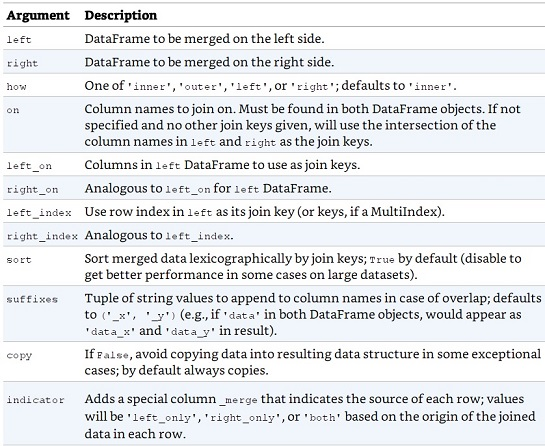

In [9]:
# Merge using index
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print(left1, '\n')
print(right1, '\n')
# merge using 'key' and reindex using right_index
print(pd.merge(left1, right1, left_on = 'key', right_index = True, 
               how='outer'), '\n') # Keep all rows

# Multi-key merge
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
print(lefth, '\n')
print(righth, '\n')
print(pd.merge(lefth, righth, left_on = ['key1', 'key2'], 
               right_index = True, how = 'outer')) # keep all rows

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5 

   group_val
a        3.5
b        7.0 

  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN 

     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0 

             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11 

     key1  key2  data  event1  event2
0    Ohio  2000   0.0     4.0     5.0
0    Ohio  2000   0.0     6.0     7.0
1    Ohio  2001   1.0     8.0     9.0
2    Ohio  2002   2.0    10.0    11.0
3  Nevada  2001   3.0     0.0     1.0
4  Nevada  2002   4.0     NaN     NaN
4  Nevada  2000   NaN     2.0     3.0


In [23]:
# Multi-index merge
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
print(left2, '\n')
print(right2, '\n')

print(pd.merge(left2, right2, how = 'outer', 
         left_index = True, right_index = True), '\n') # use both indexes

print(left2.join(right2, how = 'outer'), '\n') # Left join is default
print(left1.join(right1, on = 'key'), '\n') # index join using 'key'

# Concatenate using '.join()' - Index in Index merge
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
print(another, '\n')
print(left2.join([right2, another], sort = True), '\n') # intersection join
print(left2.join([right2, another], how = 'outer', sort = True)) # keep rows

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0 

   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0 

   Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0 

   Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0 

  key  value  group_val
0   a      0        3.5
1   b      1        7.0
2   a      2        3.5
3   a      3        3.5
4   b      4        7.0
5   c      5        NaN 

   New York  Oregon
a       7.0     8.0
c       9.0    10.0
e      11.0    12.0
f      16.0    17.0 

   Ohio  Nevada  Missouri  Alabama  New York  Oregon
a   1.0     2.0       NaN      NaN       7.0     8.0
c   3.0     4.0       9.0

In [11]:
# merge using '.concat()'
s1 = pd.Series([0, 1], index = ['a', 'b'])
s2 = pd.Series([2, 3, 4], index = ['c', 'd', 'e'])
s3 = pd.Series([5, 6], index = ['f', 'g'])

print(pd.concat([s1, s2, s3]), '\n') # append values along axis 0 (defualt)
# Concat on columns returning a DataFrame using 'axis=1'. join = 'outer'
print(pd.concat([s1, s2, s3], axis = 1, sort = True), '\n') 
# Perform intersection join 'join = inner' resulting in an empty DataFrame
print(pd.concat([s1, s2, s3], axis=1, join='inner', sort=True), '\n') 

s4 = pd.concat([s1, s3]) # create Series with shared keys
print(s4, '\n')
# create Dataframe. 'outer' join (axis = 1)
print(pd.concat([s1, s4], axis = 1, sort = True), '\n') 
# Add intersection join (join = 'inner')
print(pd.concat([s1, s4], axis = 1, sort = True, join = 'inner'), '\n')
# Join using specified index labels 
print(pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']]), '\n')

# Use hierarchial index for concatenation to track original datasets
result = pd.concat([s1, s1, s3], keys = ['one', 'two', 'three'])
print(result, '\n')
print(result.unstack(), '\n') # Create a matrix (DataFrame)
# concat using columns (axis = 1) with keys being column headers
print(pd.concat([s1, s2, s3], axis = 1, keys = ['one', 'two', 'three'],
      sort = True))

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64 

     0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0 

Empty DataFrame
Columns: [0, 1, 2]
Index: [] 

a    0
b    1
f    5
g    6
dtype: int64 

     0  1
a  0.0  0
b  1.0  1
f  NaN  5
g  NaN  6 

   0  1
a  0  0
b  1  1 

     0    1
a  0.0  0.0
c  NaN  NaN
b  1.0  1.0
e  NaN  NaN 

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64 

         a    b    f    g
one    0.0  1.0  NaN  NaN
two    0.0  1.0  NaN  NaN
three  NaN  NaN  5.0  6.0 

   one  two  three
a  0.0  NaN    NaN
b  1.0  NaN    NaN
c  NaN  2.0    NaN
d  NaN  3.0    NaN
e  NaN  4.0    NaN
f  NaN  NaN    5.0
g  NaN  NaN    6.0


In [12]:
# examples using DataFrames instead of Series
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index = ['a', 'b', 'c'],
                   columns = ['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index = ['a', 'c'],
                   columns = ['three', 'four'])
print(df1, '\n')
print(df2, '\n')
# concat using columns (axis = 1) with keys being column headers
print(pd.concat([df1, df2], axis = 1, sort = True, 
                keys = ['level1', 'level2']), '\n')

df1 = pd.DataFrame(np.random.randn(3, 4), columns = ['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns = ['b', 'd', 'a'])
print(df1, '\n')
print(df2, '\n')

print(pd.concat([df1, df2], sort = False), '\n')
# Use 'ignore_index = True' argument if row index is unimportant
print(pd.concat([df1, df2], ignore_index = True, sort = False))

   one  two
a    0    1
b    2    3
c    4    5 

   three  four
a      5     6
c      7     8 

  level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0 

          a         b         c         d
0  0.298401  0.160855 -0.649341 -0.618681
1 -1.878572 -0.432255  0.532268 -0.161221
2  0.888872  0.927581 -0.607437  0.301865 

          b         d         a
0  0.377971  0.111197  0.966890
1 -0.707457  0.926719 -0.415594 

          a         b         c         d
0  0.298401  0.160855 -0.649341 -0.618681
1 -1.878572 -0.432255  0.532268 -0.161221
2  0.888872  0.927581 -0.607437  0.301865
0  0.966890  0.377971       NaN  0.111197
1 -0.415594 -0.707457       NaN  0.926719 

          a         b         c         d
0  0.298401  0.160855 -0.649341 -0.618681
1 -1.878572 -0.432255  0.532268 -0.161221
2  0.888872  0.927581 -0.607437  0.301865
3  0.966890  0.377971       NaN  0.111197
4 -0.415594 -0.707457       NaN  0.926719


<center> Common 'concat()' arguments</center>

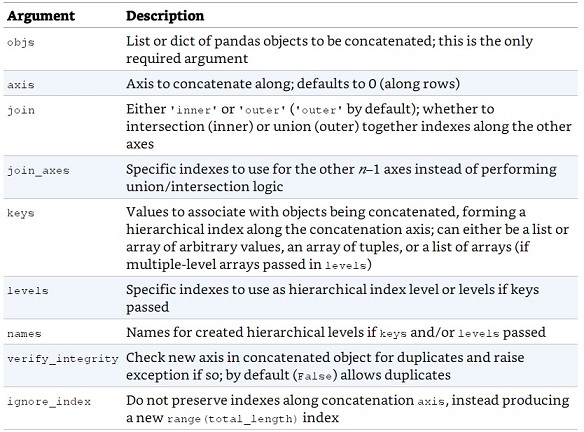

In [13]:
# Overlapping data
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5,],
              index=['a', 'b', 'c', 'd', 'e', 'f'])
print(a, '\n')
print(b, '\n')

# 'np.where()' = if 'a' == 'NaN' then use 'b' value else use 'a' value
print(np.where(pd.isnull(a), b, a), '\n') 
# compare row labels: if 'b' == 'NaN' then use 'a' value else use 'b' value
print(b.combine_first(a), '\n') # first align data then combine

# DataFrames 'combine_first()' column by column with 'a' taking priority
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
print(df1, '\n')
print(df2, '\n')
print(df1.combine_first(df2))

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64 

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64 

[0.  2.5 0.  3.5 4.5 5. ] 

a    0.0
b    4.5
c    2.0
d    0.0
e    2.5
f    5.0
dtype: float64 

     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14 

     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0 

     a    b     c
0  1.0  NaN   2.0
1  4.0  2.0   6.0
2  5.0  4.0  10.0
3  3.0  6.0  14.0
4  7.0  8.0   NaN


In [14]:
# Rearranging tabular data
# Using hiearchical indexing
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index = pd.Index(['Ohio', 'Colorado'], name = 'state'),
                    columns = pd.Index(['one','two','three'],name='number'))
print(data, '\n')

result = data.stack() # '.stack()' pivots columns into a Series (rows) 
print(result, '\n')
# Use '.unstack' to convert into a DataFrame. Default level is innermost
print(result.unstack(), '\n')
# '.unstack()' using level 0. Using state 'unstack('state')' has same result 
print(result.unstack(0), '\n')

s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys = ['one', 'two'])
print(data2, '\n')
print(data2.unstack(), '\n') # Unstacking can expose missing data
# Stacking filters out missing data so use 'dropna = False' to retain data
print(data2.unstack().stack(dropna = False), '\n')

df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns = pd.Index(['left', 'right'], name = 'side'))
print(df, '\n')
print(df.unstack('state'), '\n') # 'state' is lowest level in the unstack
print(df.unstack('state').stack('side')) # restack using 'side' axis 

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5 

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32 

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5 

state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5 

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64 

       a    b    c    d    e
one  0.0  1.0  2.0  3.0  NaN
two  NaN  NaN  4.0  5.0  6.0 

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64 

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one     

In [15]:
# Long Stacked Format
data = pd.read_csv('examples/macrodata.csv') # Load Data
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [16]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name = 'item')
data2 = data.reindex(columns = columns) # pull out 3 columns of interest
# format year/quarter to timeseries and assign to index
data2.index = periods.to_timestamp('D', 'end') 
# create Hierarchacal list and name right most column 'value'
ldata = data2.stack().reset_index().rename(columns = {0: 'value'})
ldata[:10] # show long format time series datafrome

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [17]:
# show each value per timestamp using '.pivot()'
pivoted = ldata.pivot('date', 'item', 'value')
pivoted[:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [18]:
# add a 2nd values column. In this case, the length of the data
ldata['value2'] = np.random.randn(len(ldata)) 
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.429368
1,1959-03-31 23:59:59.999999999,infl,0.000,-1.011437
2,1959-03-31 23:59:59.999999999,unemp,5.800,1.358858
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-1.621383
4,1959-06-30 23:59:59.999999999,infl,2.340,2.172266
5,1959-06-30 23:59:59.999999999,unemp,5.100,0.027920
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,2.135477
7,1959-09-30 23:59:59.999999999,infl,2.740,0.575902
8,1959-09-30 23:59:59.999999999,unemp,5.300,1.045287
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,0.834685


In [19]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -1.011437  0.429368   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  2.172266 -1.621383   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.575902  2.135477   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.979516  0.834685   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.544371 -1.367641   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  1.358858  
1959-06-30 23:59:59.999999999  0.027920  
1959-09-30 23:59:59.999999999  1.045287  
1959-12-31 23:59:59.999999999  0.501624  
1960-03-31 23:59:59.999999999 -3.719147

In [20]:
# Pivot is same as using a hierarchical index using set_index() & unstack()
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -1.011437  0.429368   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  2.172266 -1.621383   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.575902  2.135477   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.979516  0.834685   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.544371 -1.367641   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  1.358858  
1959-06-30 23:59:59.999999999  0.027920  
1959-09-30 23:59:59.999999999  1.045287  
1959-12-31 23:59:59.999999999  0.501624  
1960-03-31 23:59:59.999999999 -3.719147

In [21]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [22]:
# Converting 'Wide' to "Long" format with '.melt()' - inverse of '.pivot()'
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
print(df, '\n')

melted = pd.melt(df, ['key']) # Use 'key' as group indicator
print(melted, '\n')
# Use '.pivot()' to reformat into original layout
reshaped = melted.pivot('key', 'variable', 'value')
print(reshaped, '\n')
# Use '.reset_indec()' to move 'key' back into a data column
print(reshaped.reset_index(), '\n') 

# Select specific columns to melt using 'value_vars=' argument
# NOTE: 'id_vars =' is optional if it is first argument
print(pd.melt(df, id_vars = ['key'], value_vars = ['A', 'B']), '\n')
# you can omit groupt identifiers ('id_vars = ['key']') completely
print(pd.melt(df, value_vars = ['A', 'B', 'C']), '\n')
print(pd.melt(df, value_vars = ['key', 'A', 'B']))

   key  A  B  C
0  foo  1  4  7
1  bar  2  5  8
2  baz  3  6  9 

   key variable  value
0  foo        A      1
1  bar        A      2
2  baz        A      3
3  foo        B      4
4  bar        B      5
5  baz        B      6
6  foo        C      7
7  bar        C      8
8  baz        C      9 

variable  A  B  C
key              
bar       2  5  8
baz       3  6  9
foo       1  4  7 

variable  key  A  B  C
0         bar  2  5  8
1         baz  3  6  9
2         foo  1  4  7 

   key variable  value
0  foo        A      1
1  bar        A      2
2  baz        A      3
3  foo        B      4
4  bar        B      5
5  baz        B      6 

  variable  value
0        A      1
1        A      2
2        A      3
3        B      4
4        B      5
5        B      6
6        C      7
7        C      8
8        C      9 

  variable value
0      key   foo
1      key   bar
2      key   baz
3        A     1
4        A     2
5        A     3
6        B     4
7        B     5
8        B     6
